# Exploratory Data Analysis with Python

In this script, we will perform exploratory data analysis using some Python libraries. The goal of this work is to understand the provided data and try to extract information that can generate insights.

The file used is a dataset available on Kaggle. The dataset contains information about customers of a fictional store and helps a company better understand its customers. The owner of a store obtains information about customers through membership cards.

In [42]:
#Importing libraries and the file

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('Customers.csv')

In [5]:
# Visualizing the first five lines of the file
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [8]:
#Checking information about the file

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


The dataset consists of 2,000 records and 8 columns:

* Customer ID
* Gender 
* Age
* Annual Income
* Spending Score - Score assigned by the store based on customer behavior and spending nature
* Profession
* Years of Experience
* Family Size

In [10]:
#Summary statistics of our file

df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


We can observe the following information in our dataset:

* Customers have an average age of 49 years, with a maximum age of 99 years and a minimum age of 0 years. Despite the extremes of maximum and minimum ages, we can see that 75% of the customers are around 73 years old, and only 25% of the customers are around 25 years old. Based on this data, we can understand that the majority of customers are composed of a more mature audience.
* The average annual income is 110731 and the maximum is 189974.
* The average family size is 4 people, and 75% of the dataset has a family size of 5 people.
* The average spending score in the store is 50.96 points.

In [56]:
#Checking data by gender
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
Gender,,,,,,
Female,998.338111,48.822934,110553.715008,50.974705,4.035413,3.768128
Male,1003.649877,49.159705,110991.323096,50.944717,4.200246,3.769042


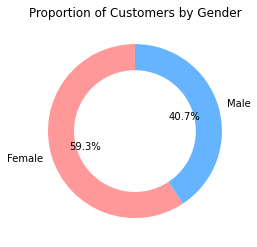

In [58]:
# Count the number of customers per gender
gender_counts = df['Gender'].value_counts()

# Create a figure with one subplot
fig, ax = plt.subplots()

# Define colors for the pie chart
colors = ['#ff9999','#66b3ff']

# Create the pie chart
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Add a title
ax.set_title('Proportion of Customers by Gender')

# Display the chart
plt.show()

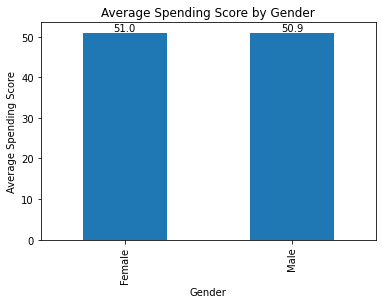

In [61]:
# Group the data by profession and calculate the mean spending score for each group
grouped = df.groupby('Gender')['Spending Score (1-100)'].mean()

# Plot a bar chart with the grouped data
bars = grouped.plot(kind='bar')

# Set the title and axis labels
plt.title('Average Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')

# Add labels to the bars
for i, v in enumerate(grouped):
    bars.text(i, v, "{:.1f}".format(v), ha='center', va='bottom')

# Show the chart
plt.show()

According to the graph, we can observe that despite the volume of women being higher than men, the average spending score according to the store's rating is quite similar.

In [21]:
#Checking data by profession
df.groupby('Family Size').mean()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience
Family Size,,,,,
1,932.856187,46.949833,108752.377926,49.645485,4.130435
2,875.858726,48.714681,104697.354571,50.362881,3.814404
3,948.340836,45.627010,106412.514469,51.951768,4.180064
4,939.463668,51.920415,109476.148789,52.709343,4.262976
5,1106.302326,50.748062,114283.461240,52.178295,4.248062
6,1171.213992,50.152263,119060.242798,49.942387,4.000000
7,1147.017094,50.008547,118191.602564,49.991453,4.141026
8,217.000000,19.000000,78607.750000,49.250000,6.000000
9,151.000000,43.000000,30000.000000,17.000000,0.000000


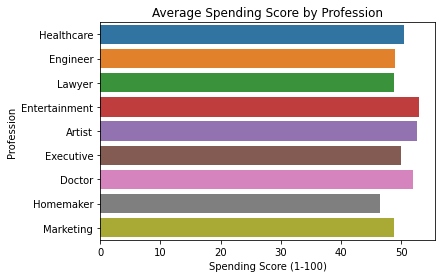

In [44]:
# Set the size of the figure
plt.figure(figsize=(6,4))

# Set the title of the plot
plt.title("Average Spending Score by Profession")

# Create the barplot with Seaborn
sns.barplot(y="Profession", x='Spending Score (1-100)', estimator=np.mean, ci=None, data=df)

# Show the plot
plt.show()

According to the graph, the professions with higher spending scores are "Artists" and "Entertainment", while the professions with lower spending scores are "Engineer" and "Lawyer". It's worth noting that these pieces of information are based on the spending score assigned by the store, which may not necessarily be equivalent to actual spending.

Text(0, 0.5, 'Average Spending Score')

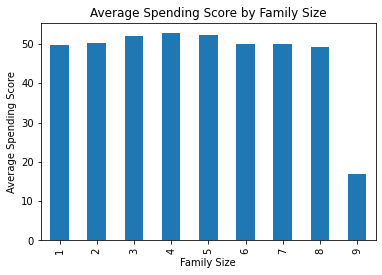

In [62]:
# Group the data by profession and calculate the mean spending score for each group
grouped = df.groupby('Family Size')['Spending Score (1-100)'].mean()

# Plot a bar chart with the grouped data
grouped.plot(kind='bar')

# Set the title and axis labels
plt.title('Average Spending Score by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Average Spending Score')

# Show the chart

# Conclusions: 

Based on the data, we can conclude that:

* The majority of customers are around 49 years old and have an average annual income of $110,731;
* The average family size is 4 people;
* The average spending score in the store is 50.96 points;
* The spending score varies among different professions, with artists and entertainment professionals having higher scores and     engineers and lawyers having lower scores;
* There is no significant difference in the average spending score between men and women, despite the higher number of women in   the dataset.
* These conclusions can provide valuable insights to the store to help them make informed decisions regarding their marketing,     sales, and customer experience strategies.